# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")

# Loading dataset

In [3]:
df1 = pd.read_csv("D:\DATASETS_THESIS\diabetes\diabetes.csv")

In [4]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df1.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df1.shape

(768, 9)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df1.isnull().values.any()

False

In [13]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df1.duplicated().sum()

0

In [12]:
df1.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [15]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Outliers

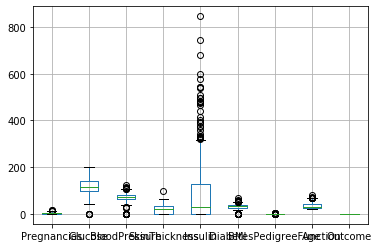

In [17]:
df1.plot.box(grid='True')

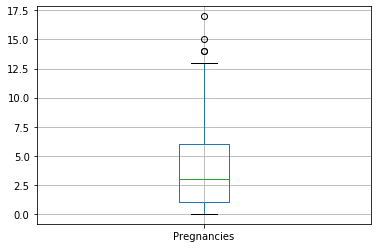

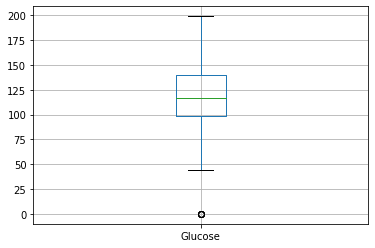

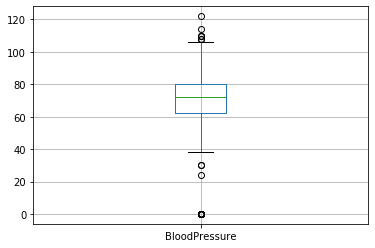

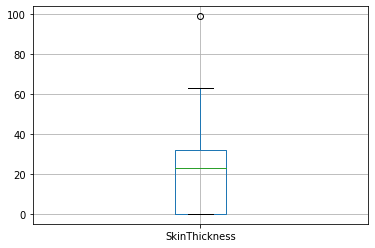

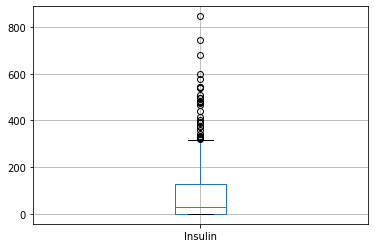

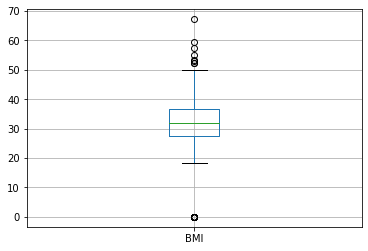

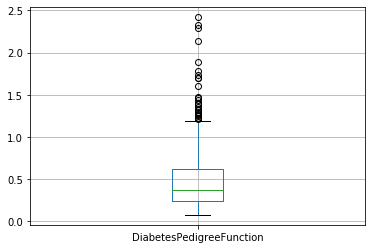

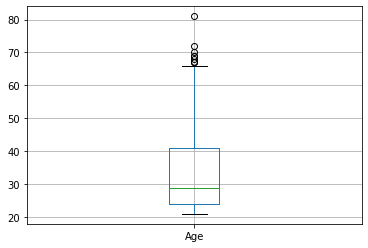

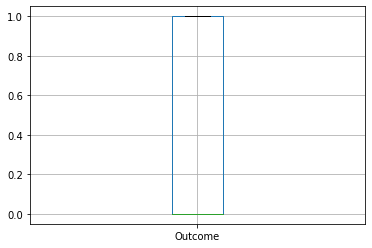

In [18]:
for i in df1.columns:
    df1.boxplot(column=i)
    plt.show()

In [19]:
min_thresold_Pregnancies = 0
max_thresold_Pregnancies = 15

min_thresold_Glucose = df1.Glucose.quantile(0.001)
max_thresold_Glucose = df1.Glucose.quantile(0.999)

min_thresold_DiabetesPedigreeFunction = df1.DiabetesPedigreeFunction.quantile(0.001)
max_thresold_DiabetesPedigreeFunction = df1.DiabetesPedigreeFunction.quantile(0.999)

print(min_thresold_DiabetesPedigreeFunction)
print(max_thresold_DiabetesPedigreeFunction)

0.082602
2.350203000000006


In [20]:
df2= df1[(df1.DiabetesPedigreeFunction < max_thresold_DiabetesPedigreeFunction) & (df1.Glucose < max_thresold_Glucose) & (df1.Pregnancies < max_thresold_Pregnancies)]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Dividing x and y

In [21]:
x=df2.drop('Outcome',axis=1)
y=df2['Outcome']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Handling class imbalance using over sampling

In [23]:

from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(1)
x_train,y_train = os.fit_resample(x_train,y_train)

In [79]:
df2['Outcome'].value_counts()

0    500
1    264
Name: Outcome, dtype: int64

In [80]:
x_train.shape 

(788, 13)

In [81]:
y_train['Outcome'].value_counts()

1    394
0    394
Name: Outcome, dtype: int64

# Correlation between features

In [35]:
corr = df2.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129455       0.144100      -0.088123   
Glucose                      0.129455  1.000000       0.151214       0.044375   
BloodPressure                0.144100  0.151214       1.000000       0.206390   
SkinThickness               -0.088123  0.044375       0.206390       1.000000   
Insulin                     -0.079305  0.336997       0.089602       0.442845   
BMI                          0.016238  0.209588       0.281784       0.382139   
DiabetesPedigreeFunction    -0.024080  0.117312       0.037397       0.163456   
Age                          0.544026  0.268326       0.240714      -0.113615   
Outcome                      0.217635  0.461384       0.063585       0.064682   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.079305  0.016238                 -0.024080   
Glucose                   0.336997  0.209

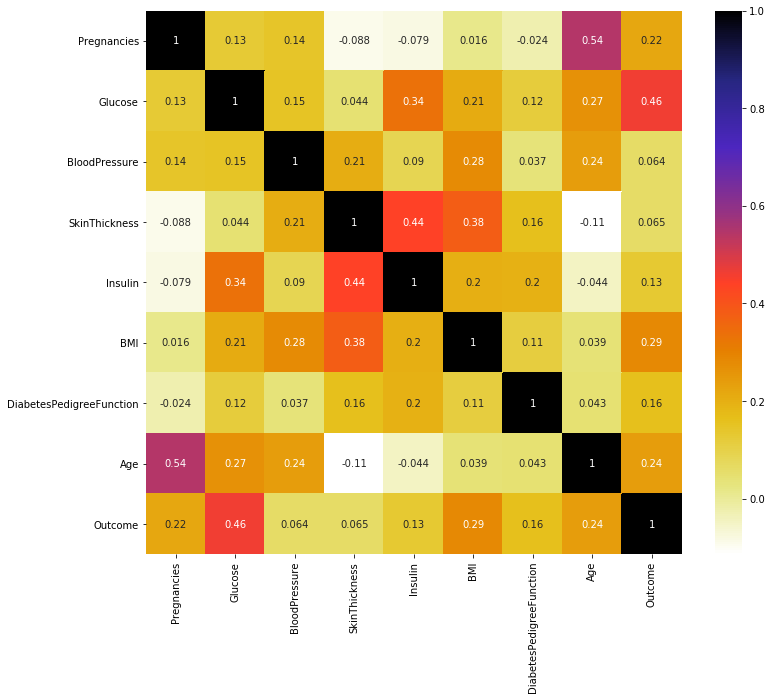

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.CMRmap_r)

In [37]:
def correlation(df,t):
    cor=set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > t:
                colnam=corr.columns[i]
                cor.add(colnam)
    return cor

In [39]:
cf = correlation(x_train,0.5)
print(cf)

{'Age'}


# Binning

### Binning BMI

In [40]:
bins =  [0, 18.6, 25, 30, 80]

group_names = ['underweight', 'normal', 'overweight', 'obese']
df2['bmi_categories'] = pd.cut(df2['BMI'], bins, labels=group_names, right=False)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_categories
0,6,148,72,35,0,33.6,0.627,50,1,obese
1,1,85,66,29,0,26.6,0.351,31,0,overweight
2,8,183,64,0,0,23.3,0.672,32,1,normal
3,1,89,66,23,94,28.1,0.167,21,0,overweight
4,0,137,40,35,168,43.1,2.288,33,1,obese
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,obese
764,2,122,70,27,0,36.8,0.340,27,0,obese
765,5,121,72,23,112,26.2,0.245,30,0,overweight
766,1,126,60,0,0,30.1,0.349,47,1,obese


In [41]:
pd.cut(df2['BMI'], bins, right=False)

0      [30.0, 80.0)
1      [25.0, 30.0)
2      [18.6, 25.0)
3      [25.0, 30.0)
4      [30.0, 80.0)
           ...     
763    [30.0, 80.0)
764    [30.0, 80.0)
765    [25.0, 30.0)
766    [30.0, 80.0)
767    [30.0, 80.0)
Name: BMI, Length: 764, dtype: category
Categories (4, interval[float64]): [[0.0, 18.6) < [18.6, 25.0) < [25.0, 30.0) < [30.0, 80.0)]

### Binning Age

In [45]:
bins = [20,40,60,100]
group_names = ['Young_Adult', 'Middle_Aged_Adult', 'Old']
df2['age_categories'] = pd.cut(df2['Age'], bins, labels=group_names)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_categories,age_categories
0,6,148,72,35,0,33.6,0.627,50,1,obese,Middle_Aged_Adult
1,1,85,66,29,0,26.6,0.351,31,0,overweight,Young_Adult
2,8,183,64,0,0,23.3,0.672,32,1,normal,Young_Adult
3,1,89,66,23,94,28.1,0.167,21,0,overweight,Young_Adult
4,0,137,40,35,168,43.1,2.288,33,1,obese,Young_Adult
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,obese,Old
764,2,122,70,27,0,36.8,0.340,27,0,obese,Young_Adult
765,5,121,72,23,112,26.2,0.245,30,0,overweight,Young_Adult
766,1,126,60,0,0,30.1,0.349,47,1,obese,Middle_Aged_Adult


In [46]:
pd.cut(df2['Age'], bins, right=False)

0       [40, 60)
1       [20, 40)
2       [20, 40)
3       [20, 40)
4       [20, 40)
         ...    
763    [60, 100)
764     [20, 40)
765     [20, 40)
766     [40, 60)
767     [20, 40)
Name: Age, Length: 764, dtype: category
Categories (3, interval[int64]): [[20, 40) < [40, 60) < [60, 100)]

In [47]:
df2['age_categories'].value_counts()

Young_Adult          572
Middle_Aged_Adult    165
Old                   27
Name: age_categories, dtype: int64

In [48]:
df2['bmi_categories'].value_counts()

obese          468
overweight     179
normal         102
underweight     15
Name: bmi_categories, dtype: int64

In [49]:
df2_new = df2.drop(['BMI','Age'], axis=1)

In [50]:
df2_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,bmi_categories,age_categories
0,6,148,72,35,0,0.627,1,obese,Middle_Aged_Adult
1,1,85,66,29,0,0.351,0,overweight,Young_Adult
2,8,183,64,0,0,0.672,1,normal,Young_Adult
3,1,89,66,23,94,0.167,0,overweight,Young_Adult
4,0,137,40,35,168,2.288,1,obese,Young_Adult
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,0,obese,Old
764,2,122,70,27,0,0.340,0,obese,Young_Adult
765,5,121,72,23,112,0.245,0,overweight,Young_Adult
766,1,126,60,0,0,0.349,1,obese,Middle_Aged_Adult


In [52]:
df2_new=df2_new[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','bmi_categories','DiabetesPedigreeFunction','age_categories','Outcome']]

In [53]:
df2_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,bmi_categories,DiabetesPedigreeFunction,age_categories,Outcome
0,6,148,72,35,0,obese,0.627,Middle_Aged_Adult,1
1,1,85,66,29,0,overweight,0.351,Young_Adult,0
2,8,183,64,0,0,normal,0.672,Young_Adult,1
3,1,89,66,23,94,overweight,0.167,Young_Adult,0
4,0,137,40,35,168,obese,2.288,Young_Adult,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,obese,0.171,Old,0
764,2,122,70,27,0,obese,0.340,Young_Adult,0
765,5,121,72,23,112,overweight,0.245,Young_Adult,0
766,1,126,60,0,0,obese,0.349,Middle_Aged_Adult,1


# One-Hot Encoding

### One-Hot Encoding on Age

In [54]:
def encode_and_bind(df2_new, feature_to_encode):
    dummies = pd.get_dummies(df2_new[[feature_to_encode]])
    res = pd.concat([df2_new, dummies], axis=1)
    return(res)

In [55]:
df2_new1 = encode_and_bind(df2_new, 'age_categories')

In [56]:
df2_new1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,bmi_categories,DiabetesPedigreeFunction,age_categories,Outcome,age_categories_Young_Adult,age_categories_Middle_Aged_Adult,age_categories_Old
0,6,148,72,35,0,obese,0.627,Middle_Aged_Adult,1,0,1,0
1,1,85,66,29,0,overweight,0.351,Young_Adult,0,1,0,0
2,8,183,64,0,0,normal,0.672,Young_Adult,1,1,0,0
3,1,89,66,23,94,overweight,0.167,Young_Adult,0,1,0,0
4,0,137,40,35,168,obese,2.288,Young_Adult,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,obese,0.171,Old,0,0,0,1
764,2,122,70,27,0,obese,0.340,Young_Adult,0,1,0,0
765,5,121,72,23,112,overweight,0.245,Young_Adult,0,1,0,0
766,1,126,60,0,0,obese,0.349,Middle_Aged_Adult,1,0,1,0


### One-Hot Encoding of BMI

In [57]:
def encode_and_bind(df2_new1, feature_to_encode):
    dummies = pd.get_dummies(df2_new1[[feature_to_encode]])
    res = pd.concat([df2_new1, dummies], axis=1)
    return(res)

In [59]:
df2_new2 = encode_and_bind(df2_new1, 'bmi_categories')

In [61]:
df2_new2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,bmi_categories,DiabetesPedigreeFunction,age_categories,Outcome,age_categories_Young_Adult,age_categories_Middle_Aged_Adult,age_categories_Old,bmi_categories_underweight,bmi_categories_normal,bmi_categories_overweight,bmi_categories_obese
0,6,148,72,35,0,obese,0.627,Middle_Aged_Adult,1,0,1,0,0,0,0,1
1,1,85,66,29,0,overweight,0.351,Young_Adult,0,1,0,0,0,0,1,0
2,8,183,64,0,0,normal,0.672,Young_Adult,1,1,0,0,0,1,0,0
3,1,89,66,23,94,overweight,0.167,Young_Adult,0,1,0,0,0,0,1,0
4,0,137,40,35,168,obese,2.288,Young_Adult,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,obese,0.171,Old,0,0,0,1,0,0,0,1
764,2,122,70,27,0,obese,0.340,Young_Adult,0,1,0,0,0,0,0,1
765,5,121,72,23,112,overweight,0.245,Young_Adult,0,1,0,0,0,0,1,0
766,1,126,60,0,0,obese,0.349,Middle_Aged_Adult,1,0,1,0,0,0,0,1


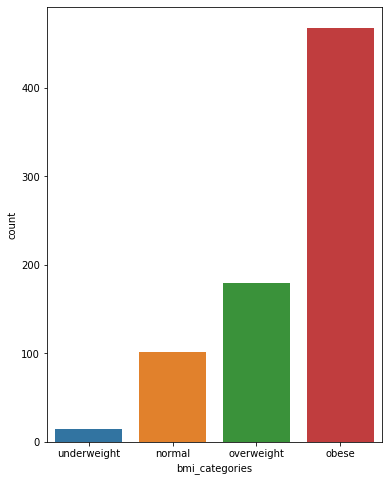

In [62]:
plt.figure(figsize=(6,8))
sns.countplot(df2_new2['bmi_categories'])

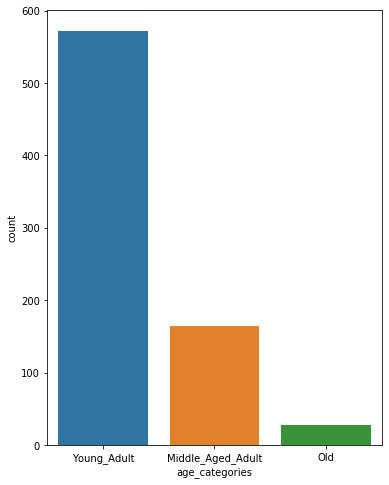

In [63]:
plt.figure(figsize=(6,8))
sns.countplot(df2_new2['age_categories'])

In [65]:
df3_new = df2_new2.drop(['bmi_categories','age_categories'], axis=1)
df3_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,age_categories_Young_Adult,age_categories_Middle_Aged_Adult,age_categories_Old,bmi_categories_underweight,bmi_categories_normal,bmi_categories_overweight,bmi_categories_obese
0,6,148,72,35,0,0.627,1,0,1,0,0,0,0,1
1,1,85,66,29,0,0.351,0,1,0,0,0,0,1,0
2,8,183,64,0,0,0.672,1,1,0,0,0,1,0,0
3,1,89,66,23,94,0.167,0,1,0,0,0,0,1,0
4,0,137,40,35,168,2.288,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,0,0,0,1,0,0,0,1
764,2,122,70,27,0,0.340,0,1,0,0,0,0,0,1
765,5,121,72,23,112,0.245,0,1,0,0,0,0,1,0
766,1,126,60,0,0,0.349,1,0,1,0,0,0,0,1


In [66]:
df_new=df3_new[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','bmi_categories_underweight','bmi_categories_normal','bmi_categories_overweight', 'bmi_categories_obese','DiabetesPedigreeFunction','age_categories_Young_Adult', 'age_categories_Middle_Aged_Adult', 'age_categories_Old','Outcome']]

In [67]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,bmi_categories_underweight,bmi_categories_normal,bmi_categories_overweight,bmi_categories_obese,DiabetesPedigreeFunction,age_categories_Young_Adult,age_categories_Middle_Aged_Adult,age_categories_Old,Outcome
0,6,148,72,35,0,0,0,0,1,0.627,0,1,0,1
1,1,85,66,29,0,0,0,1,0,0.351,1,0,0,0
2,8,183,64,0,0,0,1,0,0,0.672,1,0,0,1
3,1,89,66,23,94,0,0,1,0,0.167,1,0,0,0
4,0,137,40,35,168,0,0,0,1,2.288,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0,0,0,1,0.171,0,0,1,0
764,2,122,70,27,0,0,0,0,1,0.340,1,0,0,0
765,5,121,72,23,112,0,0,1,0,0.245,1,0,0,0
766,1,126,60,0,0,0,0,0,1,0.349,0,1,0,1


In [69]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1:]

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [71]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(1)
x_train,y_train = os.fit_resample(x_train,y_train)

In [72]:
x_train.shape

(788, 13)

In [74]:
y_train['Outcome'].value_counts()

1    394
0    394
Name: Outcome, dtype: int64

# Correlation between features after binning

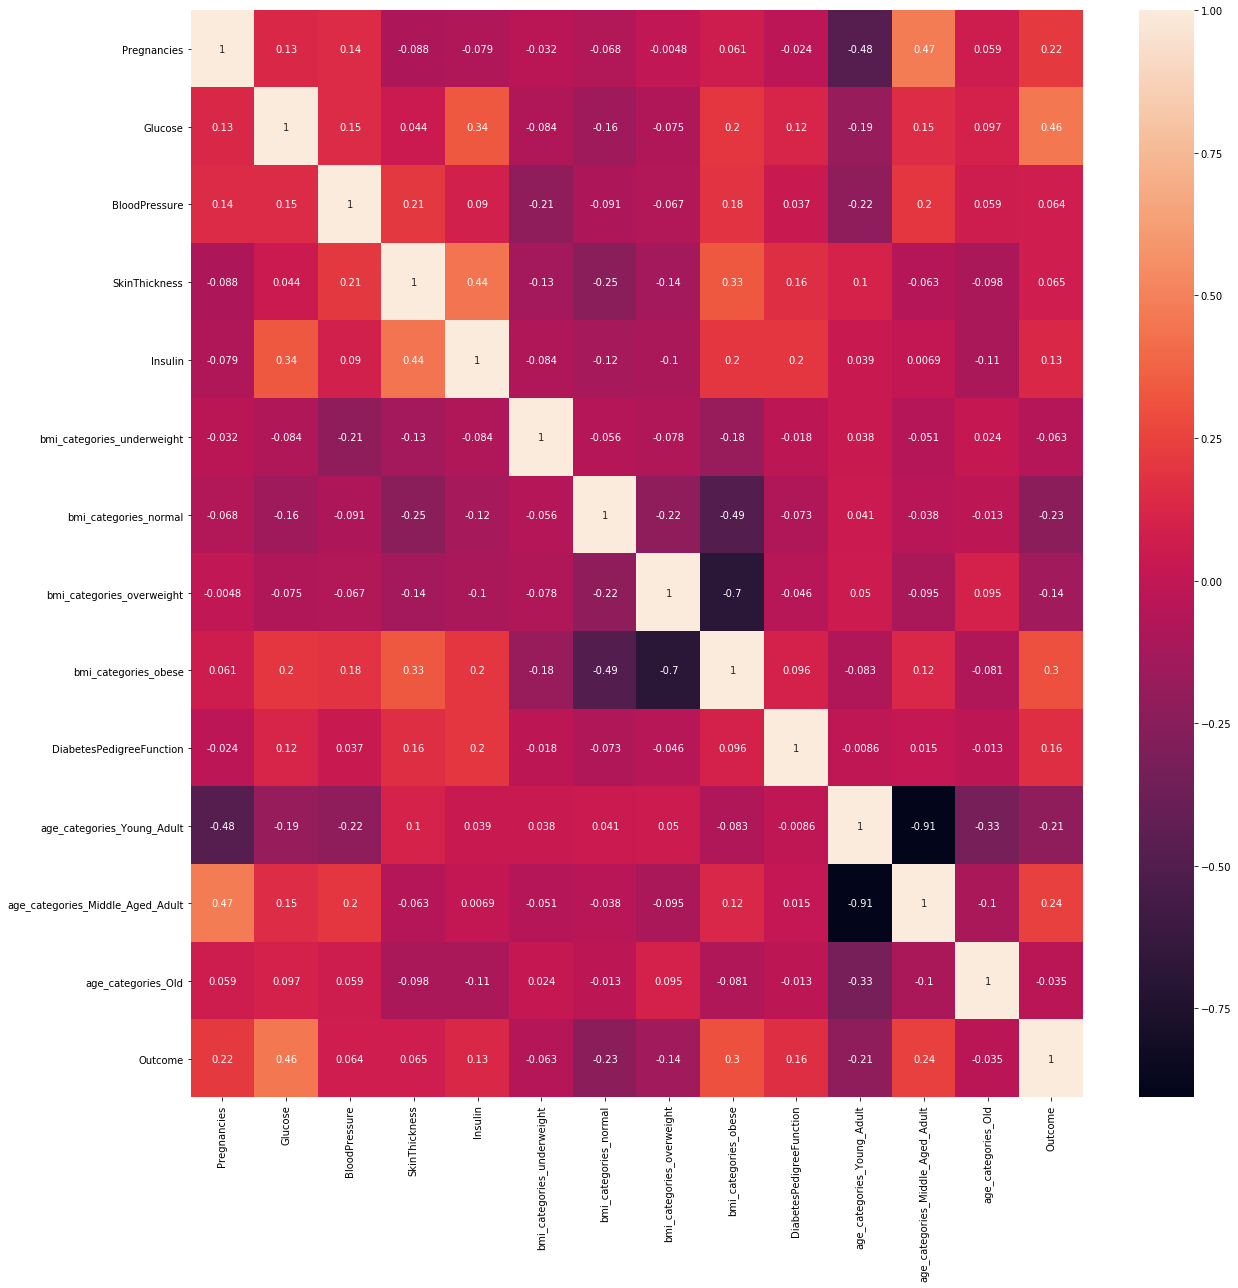

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)

# Recursive Feature Elimination and Building Models

In [ ]:
from sklearn.feature_selection import RFECV
dt = DecisionTreeClassifier(random_state=42)
rfecv = RFECV(estimator=dt, step=1, cv=StratifiedKFold(10),scoring='accuracy')
rfecv.fit(x_train,y_train)